In [25]:
%pylab inline
dat2 = np.load('/home/philcox/Save/OVERALL/Hogg_element_predictions_chieffi04_net.npz')
dat3 = np.load('/home/philcox/Save/OVERALL/Hogg_element_predictions_Nomoto2013_net.npz')
dat4 = np.load('/home/philcox/Save/OVERALL/Hogg_normalised_element_predictions_NuGrid_net.npz')

name_list = ['C04','N13','R17']
shape_list = ['o','s','^']
color_list = ['r','b','k']

data_list = [dat2,dat3,dat4]
means = [dat['mean'] for dat in data_list]
sigmas = [dat['sigma'] for dat in data_list]
elements = dat2['elements']
scores = [dat['scores'] for dat in [dat2,dat3]]
norm_scores = [dat['normalised_scores'] for dat in [dat4]]

dat2.close()
dat3.close()
dat4.close()

Populating the interactive namespace from numpy and matplotlib


In [3]:
#  Reorder
alpha_names = ['He','C','N','O','F','Ne','Na','Mg','Al','Si','P','S','Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn','Ga','Ge']

alphamean,alphasigma = [],[]
for i in range(len(data_list)):
    meanmean = np.mean(means[i],axis=0)
    meansigma = np.mean(sigmas[i],axis=0)
    re_mean,re_sig = [],[]
    for j in range(len(alpha_names)):
        for k in range(len(elements)):
            if alpha_names[j] == elements[k]:
                re_mean.append(meanmean[k])
                re_sig.append(meansigma[k])
    alphamean.append(re_mean)
    alphasigma.append(re_sig)

In [4]:
print(alphamean[1])
print(np.mean(means[1],axis=0))
print(elements)

[5.9038761507926656e-05, -0.18635277391153909, 0.13803088305941111, 0.14710849441480309, -0.020548858028303002, 0.28636284615815538, 0.32298123760346076, 0.025507855367265388, 0.073710563987007538, 0.27714453795342797, 0.031799272734501997, 0.25101424389133975, -0.53129721781613415, 0.084272406982949799, -0.87584958705495686, 0.025758426932645673, -1.0092355979428638, -0.40161287140672003, -0.23982398082103398, 0.11928374998098974, 0.14800771402915638, 0.024656615647384757, -0.32434321198494914, 0.13078556982649764, -0.0045477812934023986, 0.014861598037357393, 0.36787536175861796, 0.63375824197743635]
[  7.37105640e-02   8.42724070e-02  -1.86352774e-01   2.57584269e-02
  -5.31297218e-01  -3.24343212e-01   1.19283750e-01  -4.54778129e-03
  -2.05488580e-02   2.46566156e-02   3.67875362e-01   6.33758242e-01
   5.90387615e-05  -8.75849587e-01   2.55078554e-02   1.48007714e-01
   1.38030883e-01   3.22981238e-01   2.86362846e-01   1.30785570e-01
   1.47108494e-01   3.17992727e-02   2.510142

In [5]:
# Load in proto-solar data
ps_dat = np.load('Chempy/input/stars/Proto-sun_all.npy')
ps_nam = ps_dat.dtype.names
ps_abun = []; ps_err = []
for el in alpha_names:
    for i in range(len(ps_nam)):
        if ps_nam[i] == el:
            ps_abun.append(ps_dat[0][i])
            ps_err.append(ps_dat[1][i])

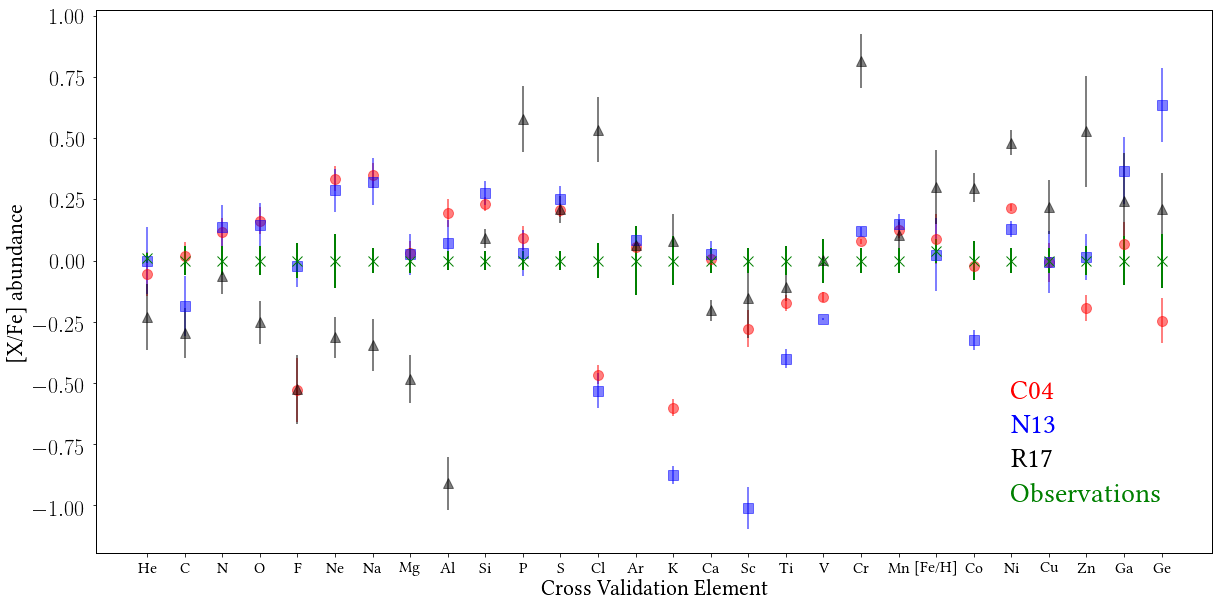

In [8]:
plt.figure(figsize=(20,10))
large_text = 28
text_size = 22
marker_size= 10
small_text = 16
plt.rc('font', family='serif',size = large_text)
plt.rc('xtick', labelsize=small_text)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 2)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
    'font.family' : 'libertine',
    'text.latex.unicode': True,
    }
plt.rcParams.update(params)

# Iterate over trials
for i in range(3):
    plt.errorbar(np.arange(len(alpha_names)),alphamean[i],yerr=alphasigma[i],fmt=shape_list[i],ms=marker_size,c=color_list[i],alpha=0.5,label=name_list[i])
    plt.text(23,-0.56-0.14*i,name_list[i],color=color_list[i])
plt.errorbar(np.arange(len(alpha_names)),ps_abun,yerr=ps_err,fmt='x',ms=marker_size,c='g',label='Observations')
plt.text(23,-0.56-0.14*3,'Observations',color='g')
plt.ylabel('[X/Fe] abundance')
plt.xlabel('Cross Validation Element')
#plt.legend(loc='upper right',)
ax=plt.gca()
#elements = alpha_names.astype("<U6")
for e,el in enumerate(alpha_names):
    if el == 'Fe':
        alpha_names[e] = '[Fe/H]'
la=plt.setp(ax,xticks=np.arange(len(alpha_names)), xticklabels=alpha_names)
plt.savefig('PaperPlots/element_prediction.pdf',dpi=300,bbox_inches='tight')

In [13]:
# Table of scores
print('Yield Set \t LOO-CV Score')
print('---------------------------------')
for i in range(2):
    print('%s: \t\t %.1f + %.1f - %.1f' %(name_list[i],np.median(scores[i]),
                                     np.percentile(scores[i],100-15.865)-np.median(scores[i]),
                                     np.median(scores[i])-np.percentile(scores[i],15.865)))

Yield Set 	 LOO-CV Score
---------------------------------
C04: 		 -28.3 + 0.1 - 0.5
N13: 		 -56.3 + 1.0 - 0.7


## Rescaling 

In [15]:
from Chempy.parameter import ModelParameters
a = ModelParameters()

# Table of scores
n_el = 28#len(a.initial_neural_names)
print('Yield Set \t Rescaled LOO-CV Score')
print('---------------------------------')
for i in range(2):
    print('%s: \t\t %.2f + %.2f - %.2f' %(name_list[i],np.median(scores[i]/n_el),
                                     np.percentile(scores[i]/n_el,100-15.865)-np.median(scores[i]/n_el),
                                     np.median(scores[i]/n_el)-np.percentile(scores[i]/n_el,15.865)))
print('%s: \t\t %.2f + %.2f - %.2f' %(name_list[2],np.median(norm_scores[0]), np.percentile(norm_scores[0],100-15.865)-np.median(norm_scores[0]),
                                     np.median(norm_scores[0])-np.percentile(norm_scores[0],15.865)))

Yield Set 	 Rescaled LOO-CV Score
---------------------------------
C04: 		 -1.01 + 0.01 - 0.02
N13: 		 -2.01 + 0.04 - 0.03
R17: 		 -1.68 + 0.05 - 0.04
